In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/transfusion.csv.csv')
df.head()


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
df.rename(columns = {'Recency (months)':'Recency',
                     'Frequency (times)':'Frequency',
                     'Monetary (c.c. blood)':'Monetary',
                     'Time (months)':'Time',
                     'whether he/she donated blood in March 2007':'Donated'}, inplace = True)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Donated    748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


<Axes: xlabel='Donated', ylabel='count'>

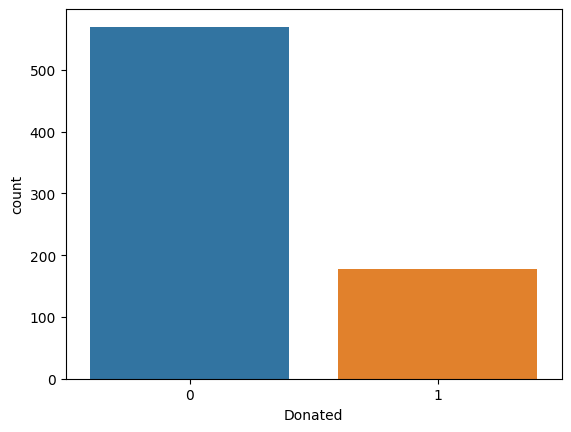

In [ ]:
sns.countplot(x =  'Donated', data = df)


In [ ]:
df['Donated'].value_counts()


0    570
1    178
Name: Donated, dtype: int64

In [ ]:
X = df.drop(columns = ['Donated'])
y = df['Donated']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.82      0.81       114
           1       0.39      0.36      0.38        36

    accuracy                           0.71       150
   macro avg       0.60      0.59      0.60       150
weighted avg       0.71      0.71      0.71       150



In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':('gini', 'entropy'),
    'splitter':('best', 'random'),
    'max_depth':(list(range(1, 20))),
    'min_samples_split':[2, 3, 4],
    'min_samples_leaf':list(range(1, 20))
}

tree_clf = DecisionTreeClassifier()
tree_cv = GridSearchCV(
    tree_clf,
    params,
    scoring = 'f1',
    n_jobs = -1,
    verbose = 1,
    cv = 5
)

tree_cv.fit(X_train, y_train)

best_params = tree_cv.best_params_

print(best_params)


Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}


In [ ]:
tree_gs = DecisionTreeClassifier(**best_params)
tree_gs.fit(X_train, y_train)

y_pred_gs = tree_gs.predict(X_test)

print(classification_report(y_test, y_pred_gs))


              precision    recall  f1-score   support

           0       0.86      0.89      0.88       114
           1       0.61      0.53      0.57        36

    accuracy                           0.81       150
   macro avg       0.74      0.71      0.72       150
weighted avg       0.80      0.81      0.80       150



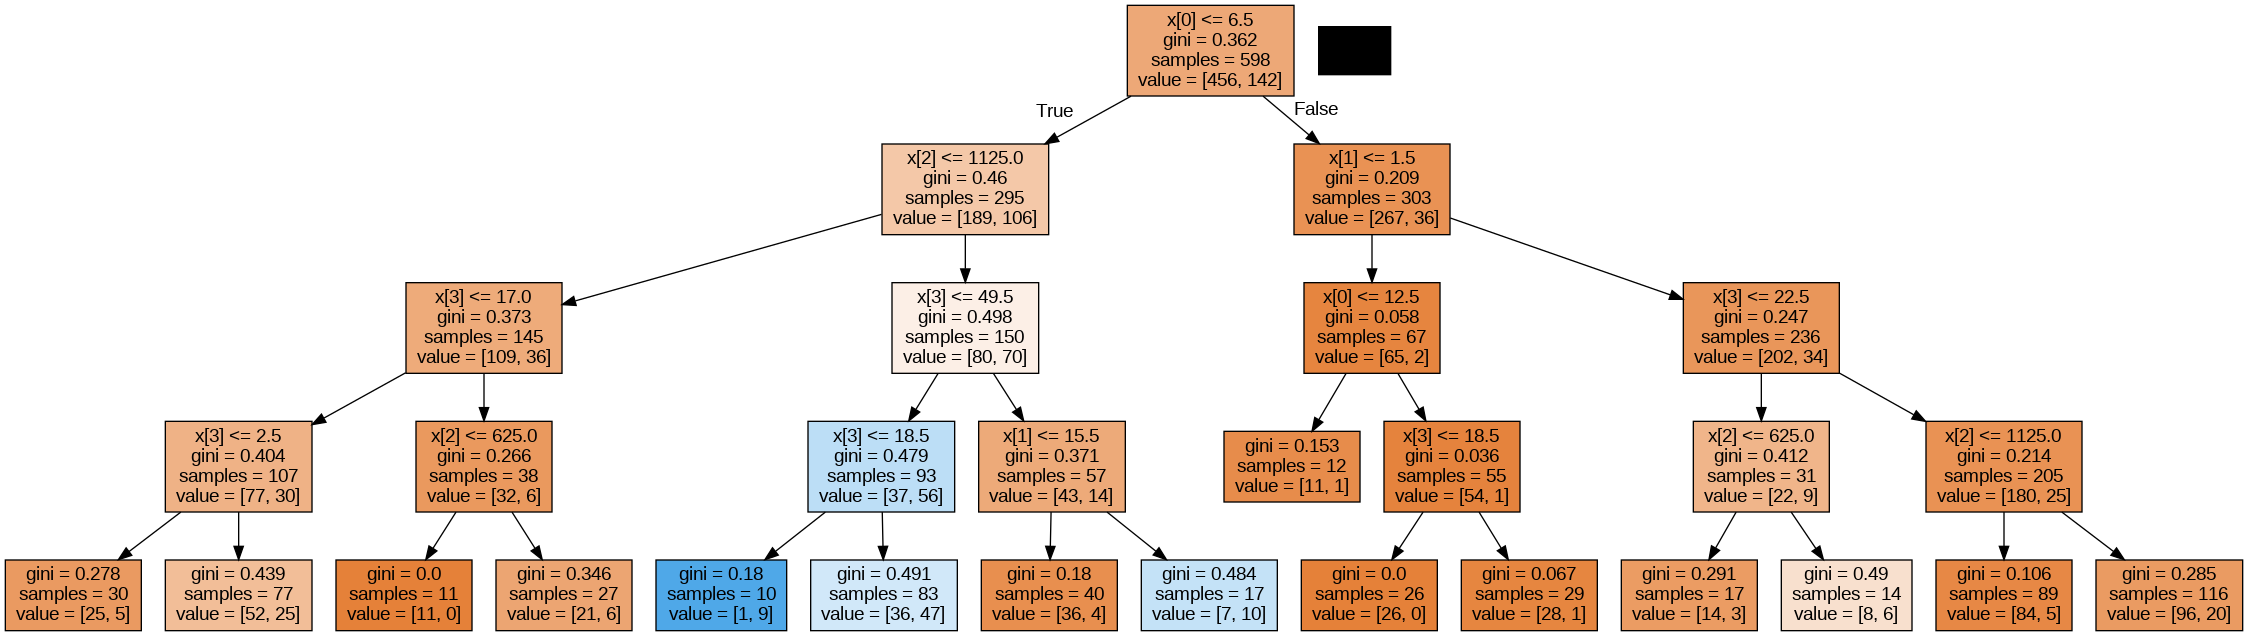

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

feature = list(df.columns).remove('Donated')

dot_data = StringIO()
export_graphviz(tree_gs, out_file = dot_data, feature_names = feature, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph[0].create_png())
